In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

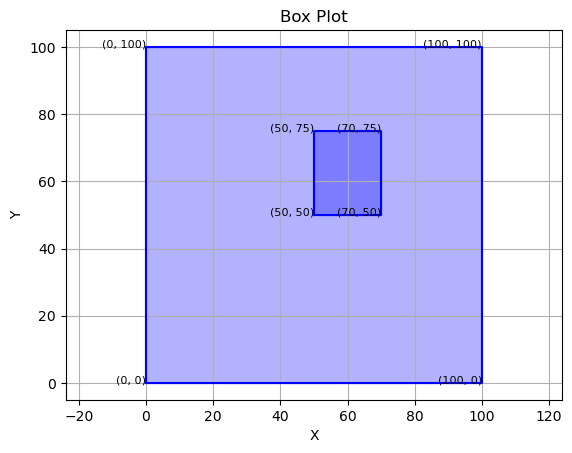

In [118]:



# Example usage:

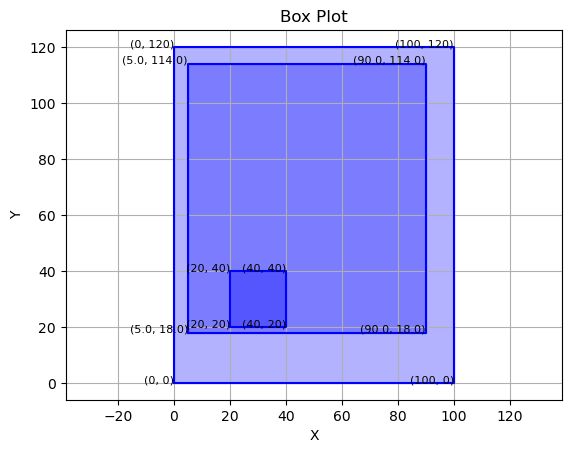

In [194]:

def create_rectangle(init_point = [0,0], height = 10,width = 10):
    x0 = init_point
    x1 = [init_point[0],init_point[1]+height]
    x2 = [init_point[0]+width, init_point[1]+height]
    x3 = [init_point[0]+width, init_point[1]]
    return [x0,x1,x2,x3]


def safe_zone_coords(image_shape):
    height = image_shape[1][1] - image_shape[0][1]
    width = image_shape[3][0] - image_shape[0][0]
    top = height*5/100
    bottom = height*15/100
    left = width*5/100
    right = width*10/100
    init_point = image_shape[0]
    init_point = [init_point[0]+left, init_point[1]+bottom]
    new_height = height-top-bottom
    new_width = width-left-right
    return create_rectangle(init_point, new_height, new_width)
def plot_boxes(*args):
    """
    Plots multiple boxes given coordinates of their vertices.

    Parameters:
        *args (list of lists): Variable number of lists containing coordinates of the box vertices.

    Returns:
        None
    """
    # Create a plot
    fig, ax = plt.subplots()

    for coordinates in args:
        # Extract x and y coordinates from the input list
        x_coords = [point[0] for point in coordinates]
        y_coords = [point[1] for point in coordinates]

        # Append the first point to the end to close the box
        x_coords.append(x_coords[0])
        y_coords.append(y_coords[0])

        # Plot the box
        ax.plot(x_coords, y_coords, color='b')  # Plot the box edges
        ax.fill(x_coords, y_coords, color='b', alpha=0.3)  # Fill the box

        # Add coordinate labels
        for (x, y) in zip(x_coords[:-1], y_coords[:-1]):
            ax.text(x, y, f'({x}, {y})', fontsize=8, ha='right')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Box Plot')

    # Display the plot
    plt.grid(True)
    plt.axis('equal')  # Set equal aspect ratio
    plt.show()
image_shape = create_rectangle([0,0], 120,100)
rec_box = create_rectangle([20,20],20,20)
plot_boxes(rec_box, image_shape, safe_zone_coords(image_shape))
safe_zone = safe_zone_coords(image_shape)

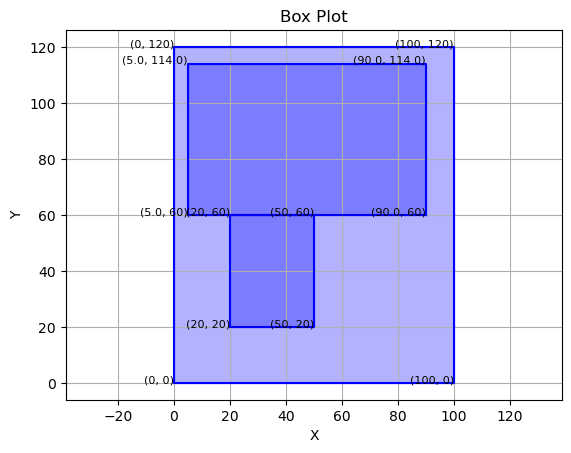

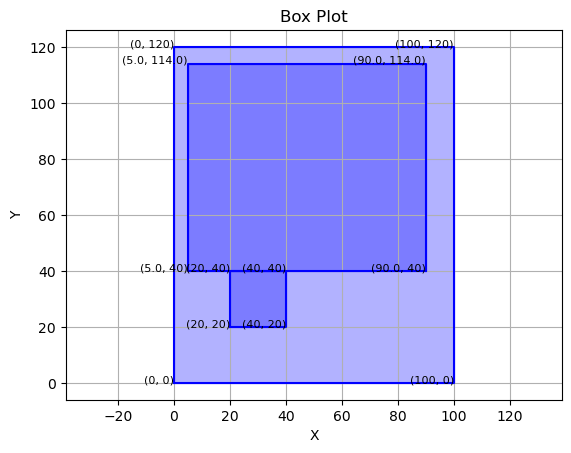

In [208]:
def find_area(coords):
    """
    Calculates the area of a polygon given its coordinates using the Shoelace formula.

    Parameters:
        coords (list of lists): Coordinates of the vertices of the polygon.

    Returns:
        float: Area of the polygon.
    """
    n = len(coords)
    area = 0
    for i in range(n):
        j = (i + 1) % n
        area += coords[i][0] * coords[j][1]
        area -= coords[j][0] * coords[i][1]
    area = abs(area) / 2.0
    return area

big_box = safe_zone
little_boxes = [create_rectangle([20,20],40,30), create_rectangle([20,20],20,20)]
box_num = 0
box = little_boxes[box_num]

def get_max_area_coords(big_box, little_box):    
    ys_box = list(set(i[1] for i in box))
    xs_box = list(set([i[0] for i in box]))
    xs_box.sort()

    xs_bb = list(set([i[0] for i in big_box]))
    ys_bb = list(set([i[1] for i in big_box]))

    ys = ys_bb+ys_box; ys.sort()

    area = 0
    for i in range(len(ys)-1):
        area_box = [xs_bb[0],ys[i]], [xs_bb[0],ys[i+1]], [xs_bb[1],ys[i+1]], [xs_bb[1],ys[i]]
        bb = list(set([i[1] for i in area_box]))
        bb.sort()
        if bb != xs_box:
            temp_area = find_area(area_box)
            if temp_area>area:
                area = temp_area
                coords = area_box
        if bb==xs_box:
            
            
        
    return area, coords



for box in little_boxes:
    area, coords = get_max_area_coords(big_box,box)
    plot_boxes(image_shape, coords, box )

In [57]:
def find_diff(p1,p2):
    h = abs(p2[1]-p1[1])
    w = abs(p2[0]-p1[0])
    return h*w
    
    
safe_zone = safe_zone_coords(image_shape)
box = rec_box

area = 0

for i in safe_zone:
    for j in box:
        temp_area = find_diff(i,j)
        if temp_area>area:
            coords = [i,j]
            
print(coords)    

[[81.0, 24.0], [70, 80]]


In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
BTC_Ticker = yf.Ticker("BTC-USD")
BTC_Data = BTC_Ticker.history(period="max")

In [2]:
ticker = yf.Ticker('NMT-USD')
data = ticker.history(period='max',interval = '1m')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-08-21 19:12:00+00:00,0.003179,0.003179,0.003179,0.003179,0,0.0,0.0
2024-08-21 19:17:00+00:00,0.003015,0.003015,0.003015,0.003015,11,0.0,0.0
2024-08-21 19:20:00+00:00,0.003015,0.003015,0.003015,0.003015,0,0.0,0.0
2024-08-21 19:27:00+00:00,0.003015,0.003015,0.003015,0.003015,0,0.0,0.0
2024-08-21 19:31:00+00:00,0.003014,0.003014,0.003014,0.003014,0,0.0,0.0


In [3]:
data['PercentageChange'] = round(data.Open.pct_change()*100,3)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,PercentageChange
Datetime,,,,,,,,
2024-08-21 19:12:00+00:00,0.003179,0.003179,0.003179,0.003179,0,0.0,0.0,NaN
2024-08-21 19:17:00+00:00,0.003015,0.003015,0.003015,0.003015,11,0.0,0.0,-5.151
2024-08-21 19:20:00+00:00,0.003015,0.003015,0.003015,0.003015,0,0.0,0.0,-0.006
2024-08-21 19:27:00+00:00,0.003015,0.003015,0.003015,0.003015,0,0.0,0.0,0.017
2024-08-21 19:31:00+00:00,0.003014,0.003014,0.003014,0.003014,0,0.0,0.0,-0.033
...,...,...,...,...,...,...,...,...
2024-08-28 18:42:00+00:00,0.003550,0.003550,0.003550,0.003550,0,0.0,0.0,-0.012
2024-08-28 18:47:00+00:00,0.003549,0.003549,0.003549,0.003549,0,0.0,0.0,-0.008
2024-08-28 18:52:00+00:00,0.003551,0.003551,0.003551,0.003551,4,0.0,0.0,0.039


In [4]:
data['Close'] = data.Open.shift(-1)
data['direction'] = data['Close'] - data['Open'] >=0
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,PercentageChange,direction
Datetime,,,,,,,,,
2024-08-21 19:12:00+00:00,0.003179,0.003179,0.003179,0.003015,0,0.0,0.0,NaN,False
2024-08-21 19:17:00+00:00,0.003015,0.003015,0.003015,0.003015,11,0.0,0.0,-5.151,False
2024-08-21 19:20:00+00:00,0.003015,0.003015,0.003015,0.003015,0,0.0,0.0,-0.006,True
2024-08-21 19:27:00+00:00,0.003015,0.003015,0.003015,0.003014,0,0.0,0.0,0.017,False
2024-08-21 19:31:00+00:00,0.003014,0.003014,0.003014,0.003015,0,0.0,0.0,-0.033,True
...,...,...,...,...,...,...,...,...,...
2024-08-28 18:42:00+00:00,0.003550,0.003550,0.003550,0.003549,0,0.0,0.0,-0.012,False
2024-08-28 18:47:00+00:00,0.003549,0.003549,0.003549,0.003551,0,0.0,0.0,-0.008,True
2024-08-28 18:52:00+00:00,0.003551,0.003551,0.003551,0.003552,4,0.0,0.0,0.039,True


In [5]:
\

SyntaxError: incomplete input (3477860531.py, line 1)

In [6]:
data['Date'] = data.index.strftime('%Y-%m-%d')
highs = data.groupby('Date')[['High']].max()
lows = data.groupby('Date')[['Low']].min()
df =highs.merge(lows, on = 'Date')
df['Change'] = (df['High'] - df['Low'])*100/df['Low']
df

,High,Low,Change
Date,,,
2024-08-21,0.003382,0.003014,12.183181
2024-08-22,0.003582,0.003027,18.313783
2024-08-23,0.003410,0.003043,12.055612
2024-08-24,0.003647,0.003110,17.248552
2024-08-25,0.003613,0.003405,6.096882
2024-08-26,0.003728,0.003575,4.267519
2024-08-27,0.003675,0.003556,3.347329
2024-08-28,0.003729,0.003549,5.068493


In [ ]:
!pip install requests_html

In [22]:
import requests
# from requests_html import HTMLSession
# session = HTMLSession()
from bs4 import BeautifulSoup
num_currencies=250
resp = requests.get(f"https://finance.yahoo.com/crypto?offset=0&count={num_currencies}")


In [31]:

tables = pd.read_html(resp.text)
df = tables[0].copy()
symbols_yf = df.Symbol.tolist()
symbols_yf

/var/folders/7w/pxtp6q0x6cg8j5qw57ylwbzw0000gn/T/ipykernel_12348/2191874688.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(resp.text)


['BTC-USD',
 'ETH-USD',
 'USDT-USD',
 'BNB-USD',
 'SOL-USD',
 'USDC-USD',
 'XRP-USD',
 'STETH-USD',
 'TON11419-USD',
 'DOGE-USD',
 'ADA-USD',
 'WTRX-USD',
 'TRX-USD',
 'WSTETH-USD',
 'WBTC-USD',
 'WETH-USD',
 'AVAX-USD',
 'SHIB-USD',
 'BCH-USD',
 'DOT-USD',
 'LINK-USD',
 'EDLC-USD',
 'LEO-USD',
 'DAI-USD',
 'LTC-USD']

In [33]:
symbols = df.Symbol.unique()
final_df = pd.DataFrame()
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    data = ticker.history(start = '2024-05-01', end= '2024-08-01', interval = '1d')
    data['Symbol'] = symbol
    final_df = pd.concat([final_df, data])


In [34]:
df = final_df.reset_index()[['Date','Symbol','Open']]
df = df.pivot_table(columns = ['Symbol'], index = 'Date')
df.columns = df.columns.get_level_values(1)
df.corr()[['BTC-USD']].sort_values('BTC-USD', ascending = False).head(10)

Symbol,BTC-USD
Symbol,
BTC-USD,1.000000
WBTC-USD,0.999887
BNB-USD,0.804669
SOL-USD,0.774884
LINK-USD,0.761261
ETH-USD,0.752709
STETH-USD,0.751030
WETH-USD,0.749138
WSTETH-USD,0.743185


In [35]:
import numpy as np
df = final_df[['Symbol','Open']]
df
change = pd.DataFrame()
for symbol in df.Symbol.unique():
    temp = df[df.Symbol == symbol].drop(columns = 'Symbol')
    temp['PctCh'] = round(temp['Open'].pct_change()*100,2)
    temp['Symbol'] = symbol
    change = pd.concat([change, temp])
change = change.reset_index().drop(columns = 'Open').pivot_table(columns = 'Symbol', index = 'Date').dropna()
change.columns = change.columns.get_level_values(1)
diff = pd.DataFrame()
for symbol in change.columns.unique():
    temp = change[[symbol,'BTC-USD']]
    rmse = np.sqrt(np.mean((temp['BTC-USD'] - temp[symbol])**2))
    
    difference = pd.DataFrame({'Symbol':[symbol],
                        'RMSE':[rmse]})
    diff = pd.concat([diff, difference])
    
change = change.corr()[['BTC-USD']].sort_values('BTC-USD', ascending = False).dropna().reset_index().merge(diff, on = ['Symbol'])
change


,Symbol,BTC-USD,RMSE
0,BTC-USD,1.000000,0.000000
1,WBTC-USD,0.998524,0.131701
2,DOGE-USD,0.836667,2.554065
3,BCH-USD,0.768309,2.318960
4,WSTETH-USD,0.759611,1.944413
5,STETH-USD,0.757261,2.011583
6,ETH-USD,0.756834,2.026865
7,WETH-USD,0.746899,2.007517
8,AVAX-USD,0.723433,2.965731
9,BNB-USD,0.723390,1.917785


introduce a lag into the temp dfs to see which coins jump right after btc jumps instead of looking at same timeframe correlation. Look at a leading correlatioon and rmse to see which alt coins will jump next


,Symbol,BTC-USD,RMSE
0,BTC-USD,1.000000,0.000000
1,WBTC-USD,0.997391,0.189599
2,BTCB-USD,0.997277,0.199009
3,NEXO-USD,0.900525,1.229347
4,OSMO-USD,0.883451,2.019795
...,...,...,...
232,PAXG-USD,-0.173119,2.763674
233,XAUT-USD,-0.180292,2.772879
234,LEO-USD,-0.187697,2.840146
235,FTT-USD,-0.188433,6.327677


In [ ]:
# df['Change'] = df['% Change'].str.replace('%','').str.replace('+','').astype(float)
df[df['Price (Intraday)']<0.09]
small = df[df['Market Cap'].str.contains('M')]
# Define a mapping dictionary for suffixes
def convert_to_scientific(value):
    suffixes = {'B': 1e9, 'M': 1e6,'T':1e12}
    if value[-1] in suffixes:
        return float(value[:-1]) * suffixes[value[-1]]
    else:
        return float(value)

# Apply the function to the 'Circulating Supply' column and assign it to 'Supply'
small['Supply'] = small['Circulating Supply'].apply(convert_to_scientific)
small['ExpectedPrice'] = 1e9/small['Supply']
small = small[small['Price (Intraday)']<small['ExpectedPrice']].head(14)
small['Expected Increase'] = round(small['ExpectedPrice']*100/small['Price (Intraday)'],2)
small[['Symbol','Name','Price (Intraday)','ExpectedPrice','Expected Increase', '% Change']]

In [4]:
df['Supply'] = df['Circulating Supply'].apply(convert_to_scientific)
df['Market Cap'] = df['Market Cap'].apply(convert_to_scientific)
df =df[['Symbol','Name', 'Price (Intraday)','Market Cap','Supply']]


In [5]:
df['Expected'] = 1e9/df['Supply']
df

,Symbol,Name,Price (Intraday),Market Cap,Supply,Expected
0,BTC-USD,Bitcoin USD,51149.630000,1.004000e+12,1.963300e+07,50.934651
1,ETH-USD,Ethereum USD,2911.940000,3.499120e+11,1.201640e+08,8.321960
2,USDT-USD,Tether USDt USD,0.999836,9.769100e+10,9.770700e+10,0.010235
3,BNB-USD,BNB USD,347.760000,5.200500e+10,1.495440e+08,6.686995
4,SOL-USD,Solana USD,106.050000,4.675300e+10,4.408410e+08,2.268392
...,...,...,...,...,...,...
245,ONT-USD,Ontology USD,0.252533,2.210290e+08,8.752500e+08,1.142531
246,ACE28674-USD,Fusionist USD,10.020000,2.200560e+08,2.197000e+07,45.516614
247,TRIBE-USD,Tribe USD,0.406758,2.171290e+08,5.338050e+08,1.873343
248,USDP-USD,Pax Dollar USD,0.999869,2.153180e+08,2.153460e+08,4.643690


In [2]:
def check_perc_change(x1, x2):
    inc = (x2-x1)*100/x1
    return inc


In [80]:
pendle = yf.Ticker('IOTX-USD')
pendle = pendle.history(period = 'max')

<Axes: xlabel='Date'>

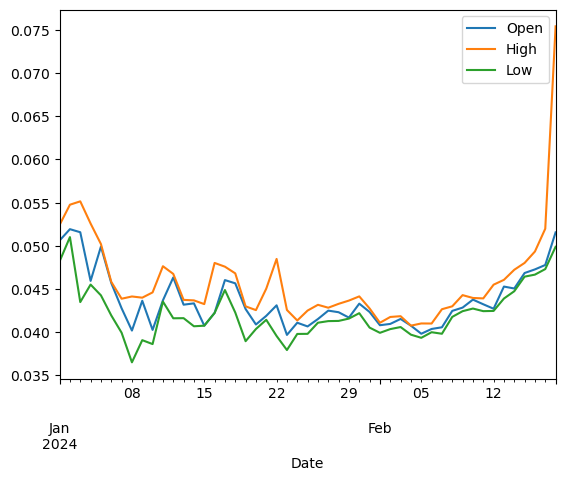

In [81]:
pendle[pendle.index >= '2024-01-01'][['Open','High','Low']].plot()

In [82]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
pendle = pendle[pendle.index>'2024-01-01']
pendle

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00+00:00,0.051915,0.054747,0.050996,0.051560,24542972,0.0,0.0
2024-01-03 00:00:00+00:00,0.051558,0.055136,0.043472,0.045926,36083624,0.0,0.0
2024-01-04 00:00:00+00:00,0.045924,0.052566,0.045500,0.049912,34032167,0.0,0.0
2024-01-05 00:00:00+00:00,0.049898,0.050194,0.044252,0.045659,18289932,0.0,0.0
2024-01-06 00:00:00+00:00,0.045683,0.045818,0.041927,0.042751,14973418,0.0,0.0
2024-01-07 00:00:00+00:00,0.042757,0.043861,0.039925,0.040153,10670218,0.0,0.0
2024-01-08 00:00:00+00:00,0.040173,0.044121,0.036496,0.043638,20510283,0.0,0.0
2024-01-09 00:00:00+00:00,0.043624,0.043982,0.039062,0.040265,12105925,0.0,0.0
2024-01-10 00:00:00+00:00,0.040251,0.044593,0.038608,0.043644,13653508,0.0,0.0


In [25]:
from statsmodels.tsa.tsatools import detrend



<Axes: xlabel='pi'>

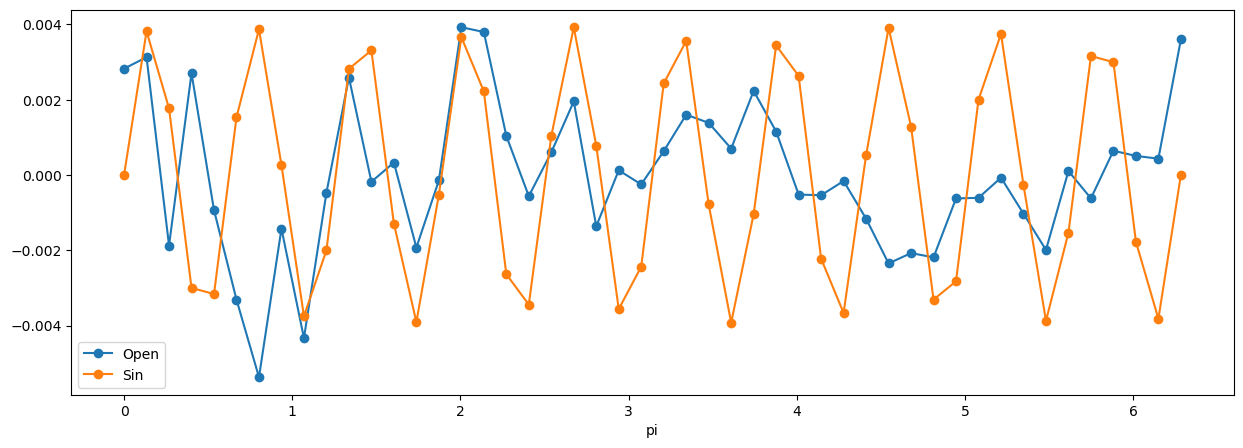

In [84]:
from math import pi
detrended = detrend(pendle.Open, order=2)
detrended = pd.DataFrame(detrended)

x = 0.03
detrended = detrended.reset_index().drop(columns = 'Date')
detrended['pi'] = np.linspace(0,2*pi, len(detrended))
detrended.set_index('pi', inplace = True)
detrended['Sin'] = max(detrended.Open)*np.sin(np.linspace(0, 2*np.pi*10, len(detrended)))
detrended.plot(figsize = (15,5), marker = 'o')



In [79]:
trend = pendle.Open - detrended.values.flatten()  # Extracting the trend from the original series
detrended_with_trend = pd.DataFrame(detrended.values + trend.values.reshape(-1, 1), index=pendle.index, columns=['Open'])


ValueError: operands could not be broadcast together with shapes (47,) (94,) 

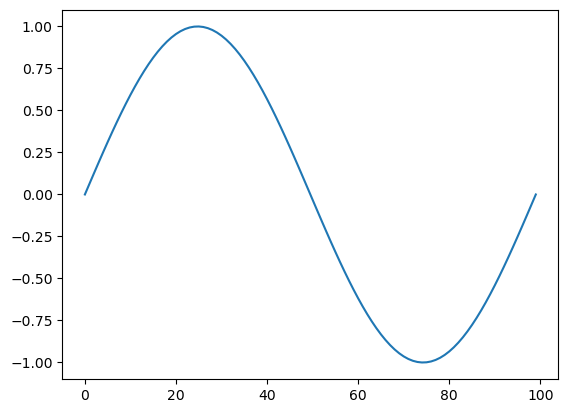

In [74]:
plt.plot([i for i in range(100)], np.sin(np.linspace(0, 2*np.pi, 100)))

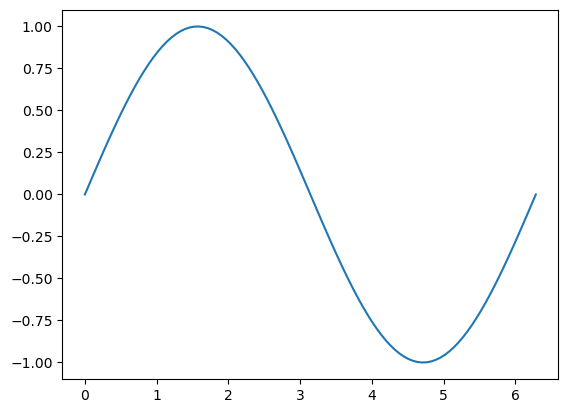

In [72]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.plot(x,y)